# **Vanilla LSTM with TCLab APMonitor Control Temperature**

A Vanilla LSTM is an LSTM model that has a single hidden layer of LSTM units, and an output layer used to make a prediction

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tclab

## **Reading data y create column 'Error'**

In [22]:
df = pd.read_csv('data.csv',)
df.columns

Index(['tm', 'Q1', 'T1', 'Tsp1'], dtype='object')

In [23]:
df['error'] = df['Tsp1'] - df['T1']
df.error

0        1.201
1        1.201
2        1.201
3        1.201
4        1.201
         ...  
14394   -0.225
14395   -0.225
14396   -0.225
14397   -0.225
14398   -0.225
Name: error, Length: 14399, dtype: float64

In [24]:
X = df[['Tsp1', 'error', 'T1']].values
y = df[['Q1']].values

## **Preprocessing of data**

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
## Scaled of data
scaler_x = MinMaxScaler()
X_scaler = scaler_x.fit_transform(X)
scaler_y = MinMaxScaler()
y_scaler = scaler_y.fit_transform(y)

## [samples, timesteps, features]
window = 30
X_lstm = []
y_lstm = []

for i in range(window, len(X)):
    X_lstm.append(X_scaler[i-window:i])
    y_lstm.append(y_scaler[i])

## Format accepted by the algorithm LSTM
X_, y_ = np.array(X_lstm), np.array(y_lstm)

## Partition of data
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, shuffle=False)

## **Modeling of Vanilla LSTM**

In [26]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(50, activation='tanh', return_sequences=True, input_shape=(X_.shape[1], X_.shape[2])))
model.add(Dropout(rate=0.3 ))
model.add(Dense(1))
model.compile (optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=200, verbose=1, validation_split=0.2, batch_size=90)

Epoch 1/200


2022-08-18 01:42:48.205563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-18 01:42:48.393115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  5/103 [>.............................] - ETA: 1s - loss: 0.0909  

2022-08-18 01:42:48.512079: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - ETA: 0s - loss: 0.0390

2022-08-18 01:42:50.418531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-18 01:42:50.480108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - 3s 21ms/step - loss: 0.0390 - val_loss: 0.0240
Epoch 2/200
103/103 [==============================] - 2s 18ms/step - loss: 0.0223 - val_loss: 0.0215
Epoch 3/200
103/103 [==============================] - 2s 17ms/step - loss: 0.0201 - val_loss: 0.0208
Epoch 4/200
103/103 [==============================] - 2s 17ms/step - loss: 0.0190 - val_loss: 0.0203
Epoch 5/200
103/103 [==============================] - 2s 17ms/step - loss: 0.0183 - val_loss: 0.0204
Epoch 6/200
103/103 [==============================] - 2s 17ms/step - loss: 0.0177 - val_loss: 0.0196
Epoch 7/200
103/103 [==============================] - 2s 17ms/step - loss: 0.0175 - val_loss: 0.0198
Epoch 8/200
103/103 [==============================] - 2s 17ms/step - loss: 0.0169 - val_loss: 0.0192
Epoch 9/200
103/103 [==============================] - 2s 17ms/step - loss: 0.0166 - val_loss: 0.0197
Epoch 10/200
103/103 [==============================] - 2s 17ms/step - loss: 0.0163 - val_loss

In [27]:
# history = model.fit(X_train, y_train, epochs=200, verbose=1, validation_split=0.2, batch_size=100)

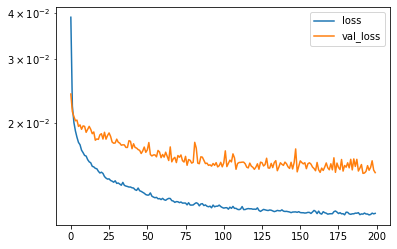

In [28]:
model.save('Lstm_vanilla.h5')
plt.semilogy(history.history['loss'], label='loss')
plt.semilogy(history.history['val_loss'], label='val_loss')
plt.legend();

## **Metrics**

In [29]:
from sklearn.metrics import mean_squared_error
predict = model.predict(X_test)

predict = scaler_y.inverse_transform(predict[:,-1,].reshape(-1,1))
yt = scaler_y.inverse_transform(y_test)
print("Mean Squered Error: ", mean_squared_error(predict[:,0], yt))

 8/90 [=>............................] - ETA: 0s 

2022-08-18 01:48:23.885893: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-18 01:48:23.949183: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


90/90 [==============================] - 1s 8ms/step
Mean Squered Error:  17.83614399048715


## **Comparing results**

[]

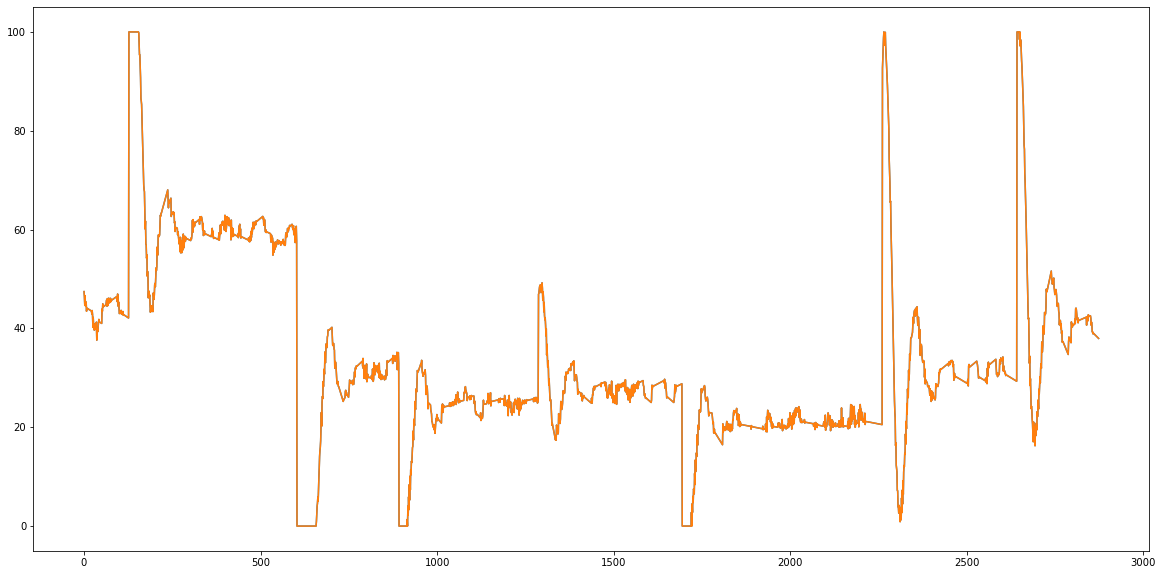

In [30]:
X_test_us = scaler_x.inverse_transform(X_test[:,-1,:])
y_test_us = scaler_y.inverse_transform(y_test)
plt.figure(figsize=(20,10))
plt.plot(yt)
plt.plot(y_test_us)
plt.plot()